In [11]:
# import liabrary

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [12]:
# import dataset

df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# drop unnecessary column

df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
df.shape

(200, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


Note: Dataset does not have any Null Value

In [16]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


/tmp/ipykernel_8362/1150832963.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True)


<AxesSubplot: >

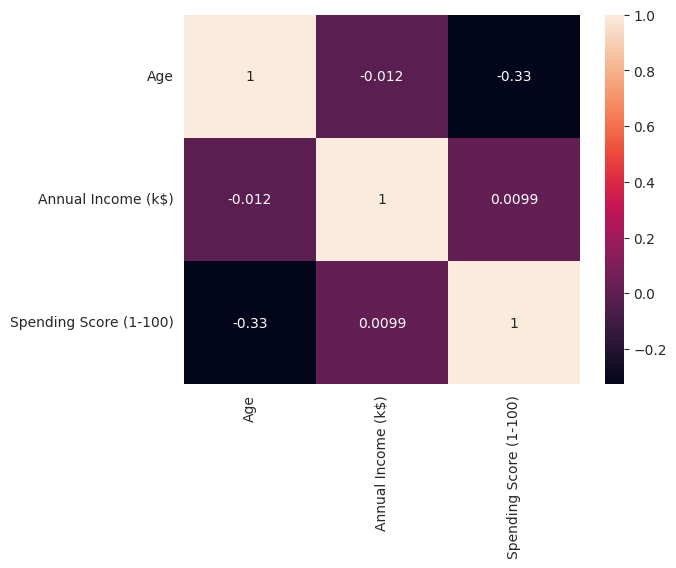

In [17]:
sns.heatmap(df.corr() , annot=True)

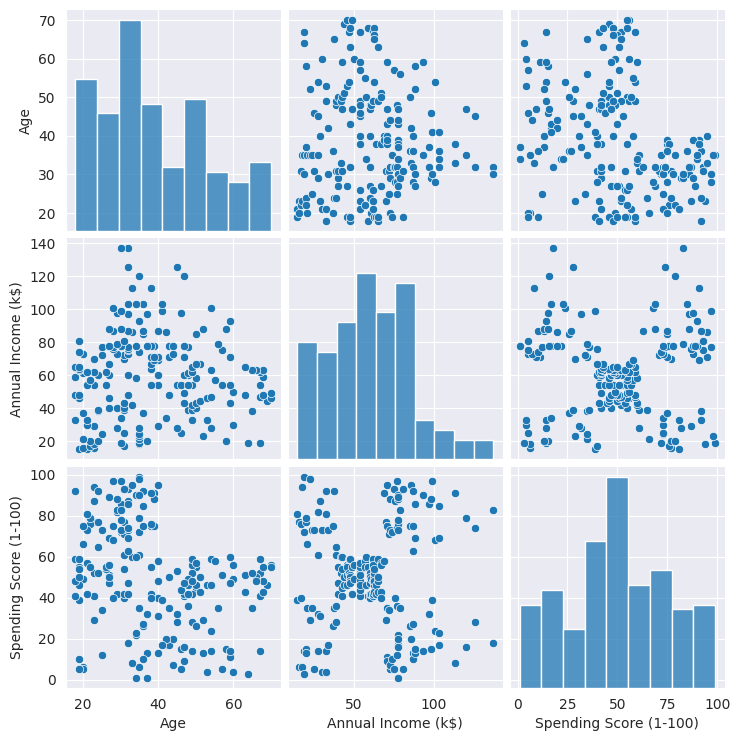

In [18]:
sns.pairplot(df)

In [19]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Gender', ylabel='count'>

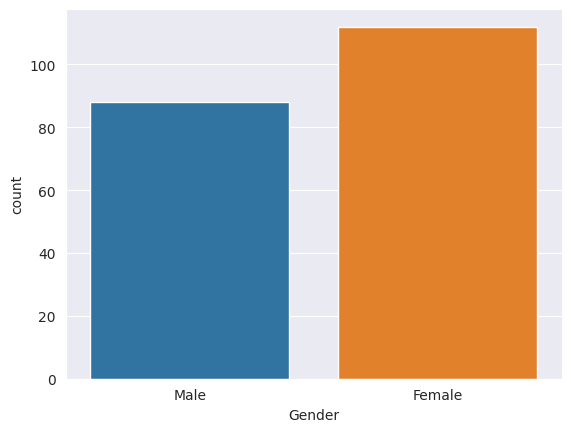

In [21]:
sns.countplot(x='Gender',data=df)

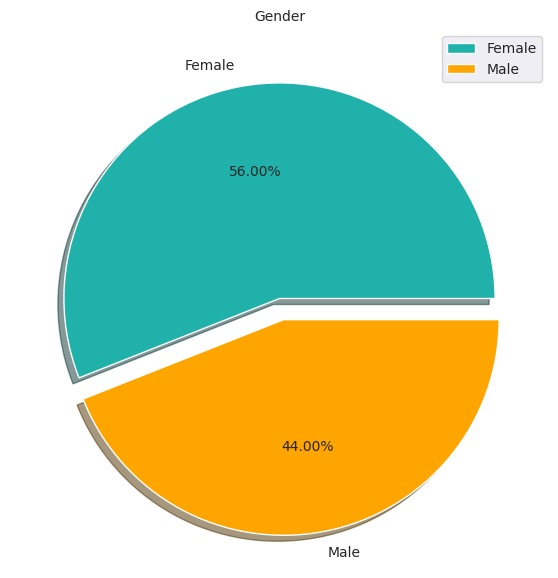

In [22]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightseagreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 10)
plt.axis('off')
plt.legend()
plt.show()

<AxesSubplot: xlabel='Gender', ylabel='Annual Income (k$)'>

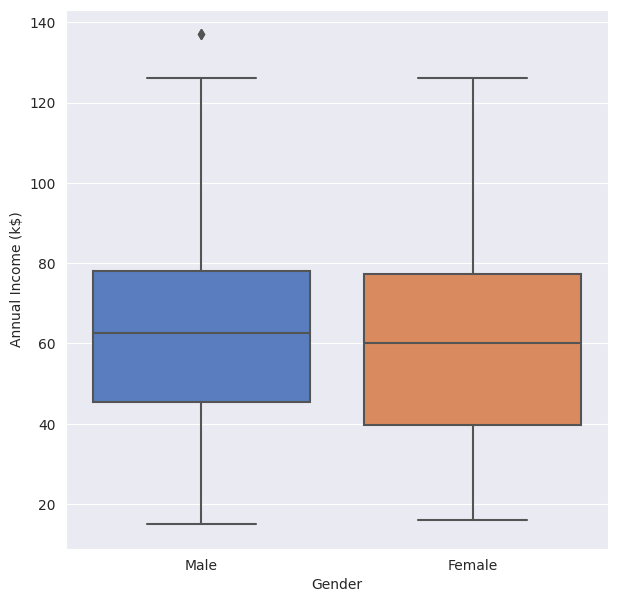

In [23]:
sns.boxplot(x='Gender',y='Annual Income (k$)',data=df,palette='muted')

<AxesSubplot: xlabel='Gender', ylabel='Spending Score (1-100)'>

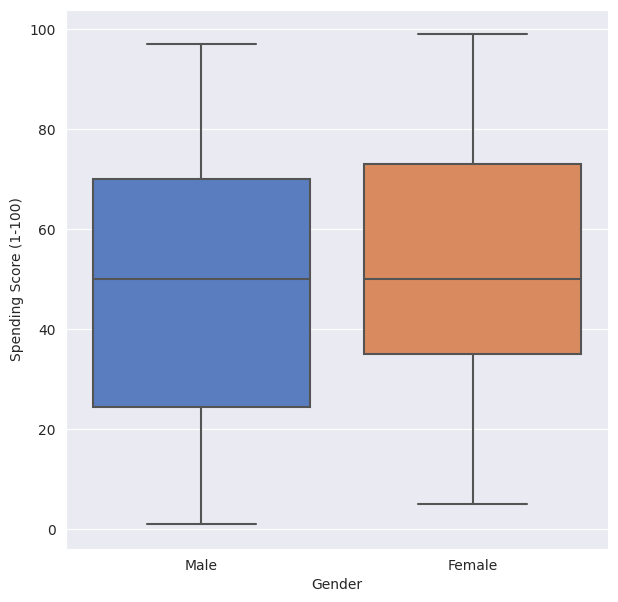

In [24]:
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=df,palette='muted')

In [25]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


<AxesSubplot: xlabel='Age', ylabel='Count'>

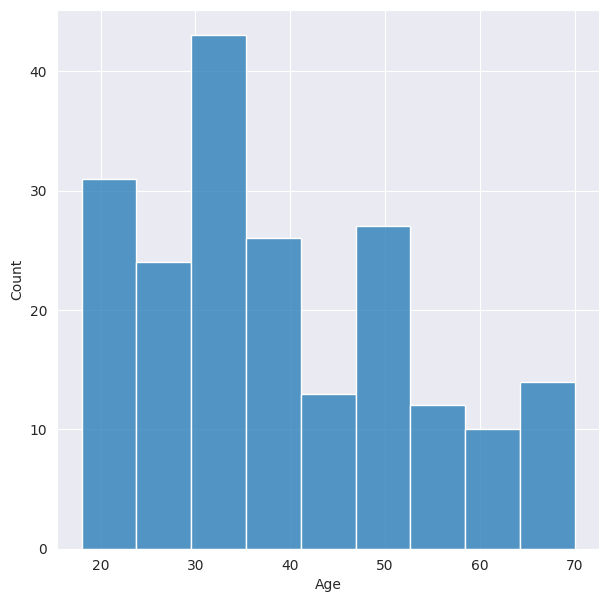

In [26]:
sns.histplot(x='Age',data=df)

<AxesSubplot: xlabel='Age', ylabel='Count'>

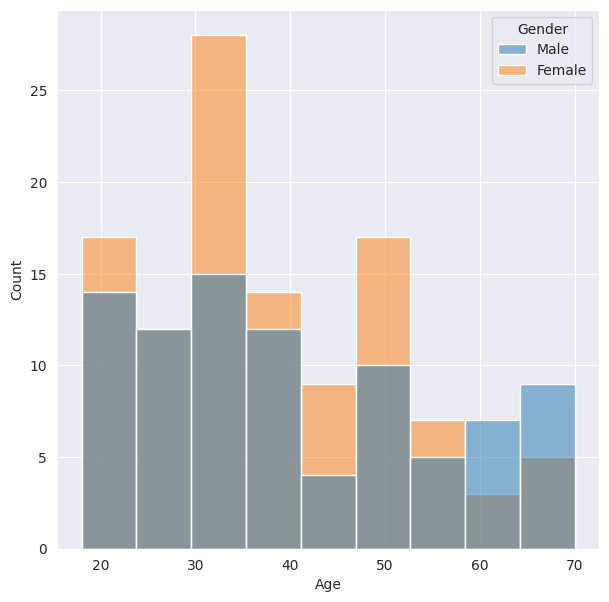

In [27]:
sns.histplot(x='Age',hue='Gender',data=df)

Text(43.165881944444436, 0.5, 'Annual Income (k$)')

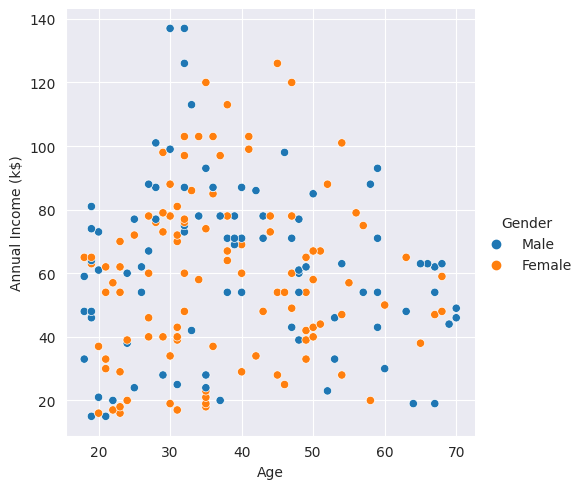

In [28]:
sns.relplot(x='Age',y='Annual Income (k$)',data=df,hue='Gender',kind='scatter')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

Text(43.165881944444436, 0.5, 'Spending Score (1-100)')

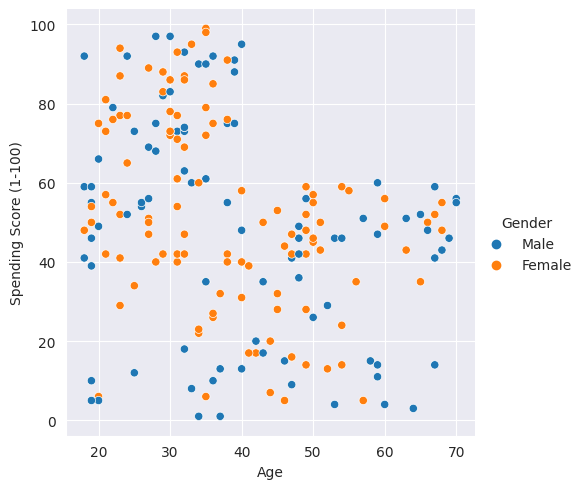

In [29]:
sns.relplot(x='Age',y='Spending Score (1-100)',data=df,hue='Gender',kind='scatter')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

Text(5.069444444444445, 0.5, 'Spending Score (1-100)')

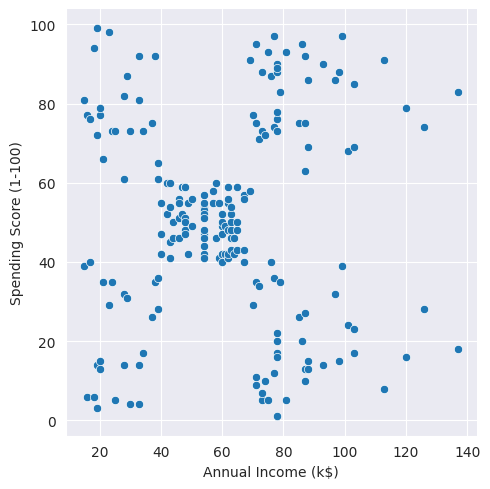

In [30]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,kind='scatter')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Text(43.165881944444436, 0.5, 'Spending Score (1-100)')

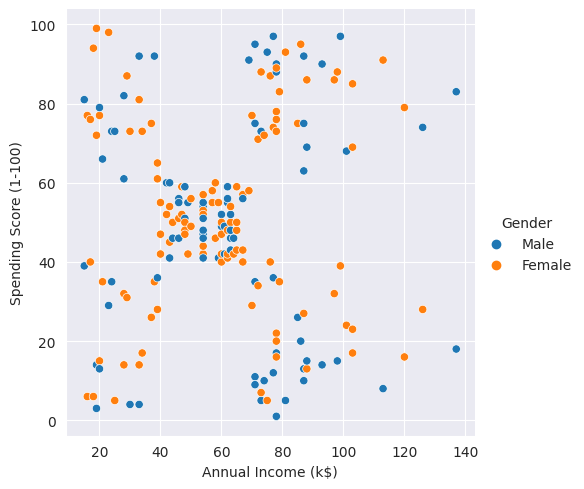

In [31]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue='Gender',kind='scatter')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [32]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


# K-Means Clusturning

In [33]:
# 0 represents Male
# 1 represents Female

df['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [34]:
df['Gender'].dtype

dtype('int64')

In [35]:
from sklearn.cluster import KMeans

In [36]:
# label encoding 

from sklearn.preprocessing import LabelEncoder

In [37]:
enc = LabelEncoder()

In [38]:
lst = []
for i in range(1,11):
    k_model= KMeans(n_clusters = i, n_init = 15, max_iter = 500) 
    k_model.fit(df)
    lst.append(k_model.inertia_)

In [39]:
lst

[308862.06,
 212889.44245524297,
 143391.59236035676,
 104414.67534220168,
 75412.59682443162,
 58348.64136331506,
 51130.69008126376,
 44391.820804870804,
 40655.68621378622,
 37509.9794142639]

Text(0.5, 1.0, 'Elbow Theroy')

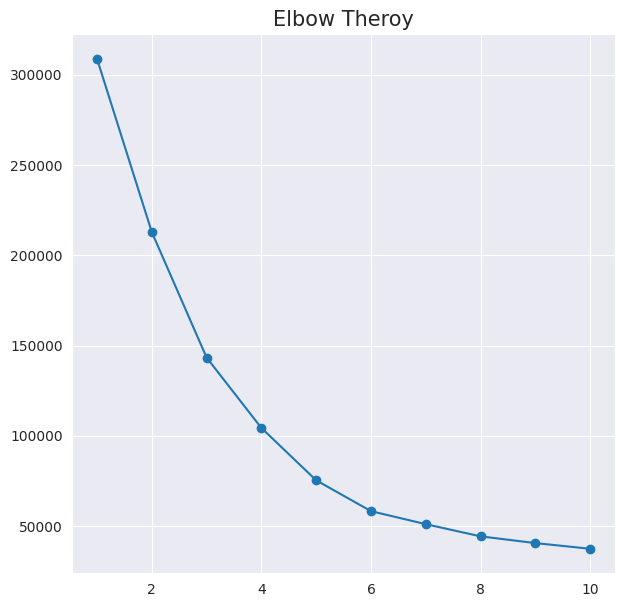

In [40]:
plt.plot(range(1,11), lst, marker = 'o')
plt.title('Elbow Theroy',fontsize=15)

In [41]:
k_model = KMeans(n_clusters = 5)

Note: Used 5 rather than 6 beacuse of better clustering result

In [42]:
k_model.fit(df)

KMeans(n_clusters=5)

In [43]:
prediction = k_model.predict(df)

In [44]:
k_model.cluster_centers_

array([[ 0.60869565, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.58227848, 43.08860759, 55.29113924, 49.56962025],
       [ 0.47222222, 40.66666667, 87.75      , 17.58333333],
       [ 0.60869565, 25.52173913, 26.30434783, 78.56521739],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513]])

In [45]:
len(k_model.cluster_centers_)

5

In [46]:
df['Clusters'] = prediction

In [47]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,0
1,0,21,15,81,3
2,1,20,16,6,0
3,1,23,16,77,3
4,1,31,17,40,0


In [49]:
#visulaizing the clusters  
plt.scatter(x[prediction == 0, 0], x[prediction == 0, 1], s = 50, c = 'red', label = 'Cluster 1')  
plt.scatter(x[prediction == 1, 0], x[prediction == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')  
plt.scatter(x[prediction== 2, 0], x[prediction == 2, 1], s = 50, c = 'green', label = 'Cluster 3')  
plt.scatter(x[prediction == 3, 0], x[prediction == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[prediction == 4, 0], x[prediction == 4, 1], s = 50, c = 'black', label = 'Cluster 5')  
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

NameError: name 'x' is not defined